#### PCA降维MNIST数据

+ 读取MNIST数据集（测试样本）
+ PCA算法将样本由784维向量降维为200维向量

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

data = pd.read_csv("MNIST_test.csv")
X_test = data.iloc[:,1:785].to_numpy()
y_test = data.iloc[:,0].to_numpy()

pca = PCA(n_components=200).fit(X_test)
X_pca = pca.transform(X_test)

print("Original Shape:", X_test.shape)
print("Transformed Shape:", X_pca.shape)

Original Shape: (10000, 784)
Transformed Shape: (10000, 200)


**显示主成分**

+ 显示样本的均值
+ 显示前9个主成分

NameError: name 'w' is not defined

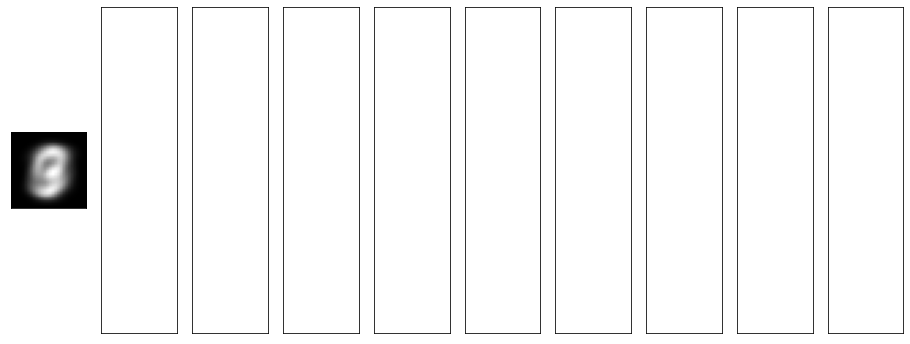

In [2]:
import matplotlib.pyplot as plt

fix, axes = plt.subplots(1,10,figsize=(16,6),subplot_kw={'xticks':(), 'yticks':()})
mu = pca.mean_; image = mu.reshape([28,28])
axes[0].imshow(image,cmap='gray')

for i, ax in zip(range(9),axes[1:].ravel()):
    e = pca.components_[i,:]
    image = e.reshape([28,28])
    ax.imshow(image,cmap='gray')

plt.plot()

**数据重构**

+ 显示原图像
+ 显示分别有前{1,5,10,20,50,100,200}个主成分恢复的数字图像

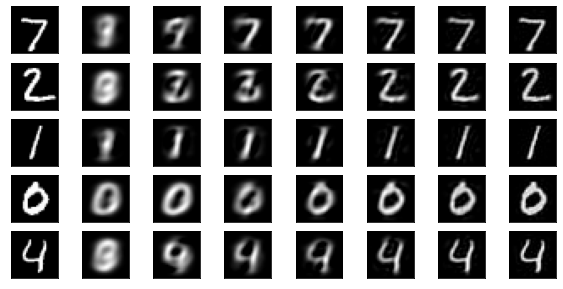

In [3]:
fix, axes = plt.subplots(5,8,figsize=(10,5),subplot_kw={'xticks':(), 'yticks':()})
for i in range(5):
    x = X_test[i,:]; image = x.reshape([28,28])
    axes[i,0].imshow(image, cmap="gray")
    for n_components, ax in zip([1,5,10,20,50,100,200], axes[i,1:].ravel()):
        E = pca.components_[0:n_components,:]
        x_recons = np.matmul(X_pca[i,0:n_components], E) + pca.mean_
        x_recons[x_recons<0] = 0
        image = np.floor(x_recons.reshape([28,28]))
        ax.imshow(image,cmap='gray')

plt.show()